Master Capsatone Project


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [29]:
df= pd.read_csv("IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


Check the size off rows and columns of the dataset


In [30]:
print(f"Type rows are {df.shape[0]} and your colomns are {df.shape[1]}")

Type rows are 74 and your colomns are 20


How, here comes some Basic Questions


1. Which team won the matches most ?


Text(0.5, 1.0, 'Most Match Win by Team')

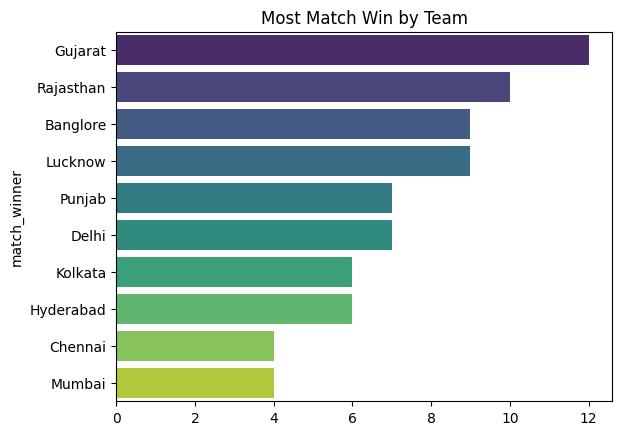

In [32]:
match = df["match_winner"].value_counts()
sns.barplot(y=match.index, x=match.values, palette='viridis')
plt.title("Most Match Win by Team")



2. Toss Decision Trends


Text(0.5, 1.0, 'Toss Decision Treands')

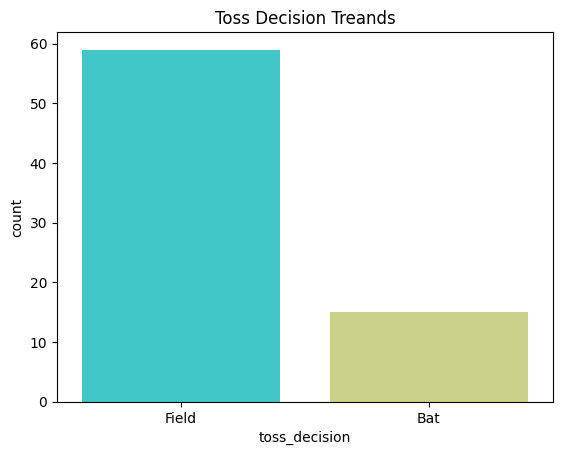

In [ ]:
sns.countplot(x = df['toss_decision'],palette="rainbow")
plt.title("Toss Decision Treands")

3. Toss Winner vs Match Winner


In [ ]:
count = df[df['toss_winner']== df['match_winner']]['match_id'].count()
percentage = (count +100 )/df.shape[0]
percentage.round(2)

np.float64(1.84)

4. How do Team win ? (Runs vs Wickets)


Text(0.5, 1.0, 'Won By')

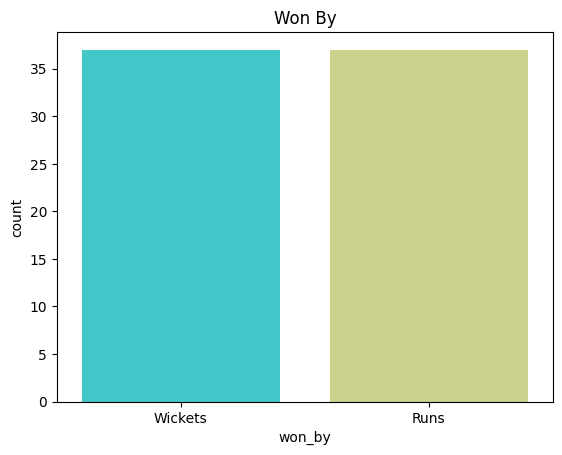

In [ ]:
sns.countplot(x = df['won_by'],palette="rainbow")
plt.title("Won By")

Key Player Performances


1 . most 'player of the match" Awards


In [ ]:
count = df['player_of_the_match'].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 1O Player of the Match ')

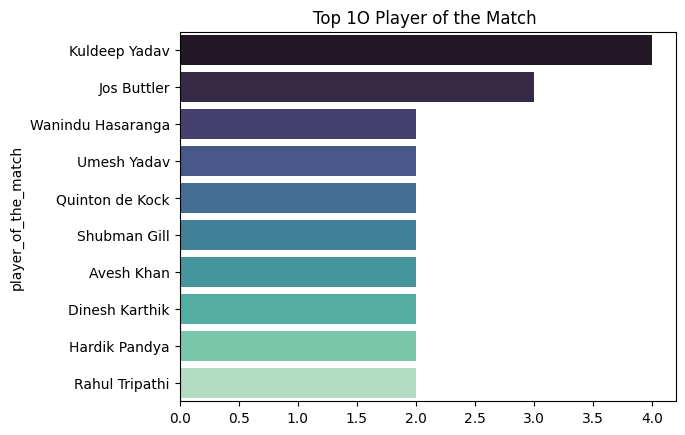

In [ ]:
sns.barplot(x = count.values, y = count.index,palette="mako")
plt.title("Top 1O Player of the Match ")

2 top scorers


In [ ]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

Text(0.5, 1.0, 'Top Scorer')

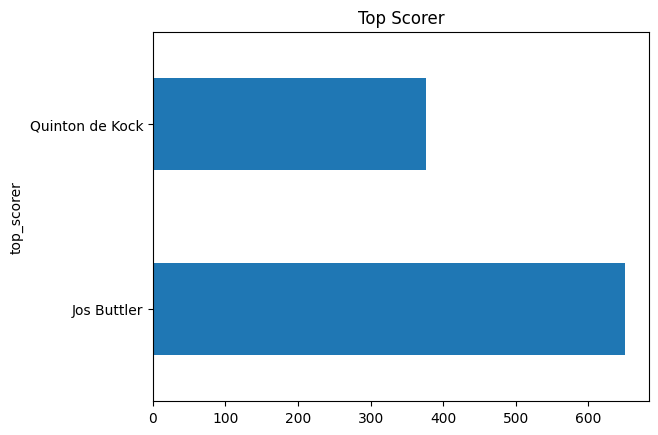

In [ ]:
high.plot(kind='barh' )
plt.title("Top Scorer")

10 Best Bowling figures


Text(0.5, 1.0, 'Highest Wicket Takeer Bowler ')

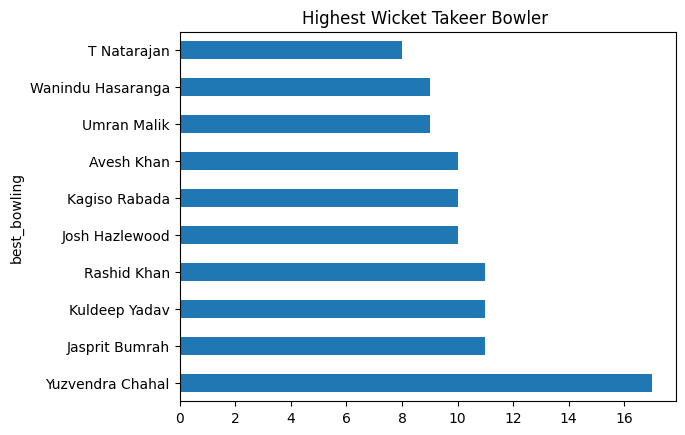

In [ ]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: int(x.split('--')[0]))

top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers
top_bowlers.plot(kind= "barh")
plt.title("Highest Wicket Takeer Bowler ")


Venue Analysis


most matches played by vanue


In [ ]:
venue_count = df['venue'].value_counts()
venue_count



venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

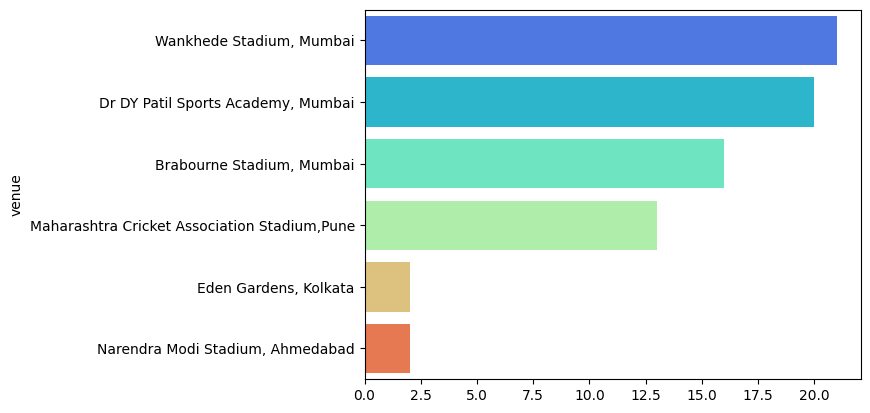

In [ ]:
sns.barplot(y = venue_count.index,x= venue_count.values,palette="rainbow")

custom question & insight


In [ ]:
# who won the highest margin by runs?
df[df['won_by']=='Runs'].sort_values(by= "margin",ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


2.  which player has the highest individual score ?


In [ ]:
df[df['highscore'] ==df['highscore'].max()][['top_scorer',"highscore"]]

,top_scorer,highscore
65,Quinton de Kock,140


Which bowler had the best bowling figures
?


In [ ]:
if 'highest_wickets' not in df.columns:
	df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: int(x.split('--')[0]))

# core
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
